# **Tra cứu giá vé máy bay trên trang web Vietject bằng Selenium**
- Môn học: Nhập Môn Khoa Học Dữ Liệu

- MSSV: 20120308

- Họ và tên: Bùi Thanh Tùng



Chương trình được thực thi trên **google colab**

**Install và Import các thư viện cần thiết:**

In [1]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
!pip install webdriver_manager

Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [1,038 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:1

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from webdriver_manager.chrome import ChromeDriverManager

In [3]:
from bs4 import BeautifulSoup
from datetime import date, timedelta
import pandas as pd
import numpy as np
import time
from PIL import Image

**Tạo Chrome Driver**

In [4]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')  #ẩn cửa sổ chrome
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument("--disable-extensions");
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--window-size=1920,1080")
driver = webdriver.Chrome('chromedriver',options=chrome_options)

In [5]:
!chromedriver -v

ChromeDriver 107.0.5304.87 (f59ffb32abf8c01e9aa298400314bfdf0221b02f-refs/branch-heads/5304@{#1093})


**Chọn mã sân bay bắt đầu đi và mã sân bay đến (có thể thay đổi)**

In [6]:
#mã sân bay đi và đến
_from='SGN'
_to='DAD'
url="https://www.vietjetair.com/vi/"

**Truy cập trang web**

In [7]:
driver.get(url)

**Thực hiện các thao tác để lấy dữ liệu**

In [8]:
#tắt ô thông báo
#driver.find_element(By.ID,"onesignal-slidedown-cancel-button").click()

In [9]:
#chọn ô điểm đi
driver.find_element(By.XPATH, '//*[@id="root"]/div[1]/div[3]/div[2]/div/div/div[2]/div[2]/div[1]/div[1]/div/div/input').click()

In [10]:
#nhập điểm đi
driver.implicitly_wait(5)

for k in _from:
  driver.find_element(By.XPATH, '//*[@id="root"]/div[1]/div[3]/div[2]/div/div/div[2]/div[2]/div[1]/div[1]/div/div/input').send_keys(k)

In [11]:
# driver.save_screenshot('result.png')
# img = Image.open('result.png')
# img

In [12]:
#chọn điểm đi
driver.find_element(By.XPATH, '//*[@id="panel1a-content"]/div/div').click()

In [13]:
#nhập điểm đến
driver.implicitly_wait(5)

for k in _to:
  driver.find_element(By.XPATH, '//*[@id="arrivalPlaceDesktop"]').send_keys(k)

In [14]:
# driver.save_screenshot('result.png')
# img = Image.open('result.png')
# img

In [15]:
#chọn điểm đến
driver.implicitly_wait(5)
driver.find_element(By.XPATH, '//*[@id="panel1a-content"]/div').click()

In [16]:
#chọn loại vé 1 chiều
driver.implicitly_wait(3)
driver.find_element(By.XPATH, '//*[@id="root"]/div[1]/div[3]/div[2]/div/div/div[3]/div/div[1]/div/div/div/div[2]/label/span[1]/span[1]/input').click()

In [17]:
# Ngày mai là ngày bao nhiêu?
today = date.today()
tomorrow = today + timedelta(1)
print(tomorrow)

2022-11-30


In [18]:
#test thử khi qua tháng khác

#today=date.fromisoformat('2022-11-30')
#tomorrow = today + timedelta(1)
#tomorrow

In [19]:
#chọn vé vào ngày mai
if today.month==tomorrow.month:
    day=driver.find_element(By.XPATH, '//*[@id="root"]/div[1]/div[3]/div[2]/div/div/div[3]/div/div[2]/div/div/div[2]/div[1]/div[3]')
    day.find_element(By.XPATH, '//*[@id="root"]/div[1]/div[3]/div[2]/div/div/div[3]/div/div[2]/div/div/div[2]/div[1]/div[3]/ \
                 button['+str((tomorrow.day)+1)+']').click()
else:
    day=driver.find_element(By.XPATH, '//*[@id="root"]/div[1]/div[3]/div[2]/div/div/div[3]/div/div[2]/div/div/div[2]/div[2]/div[3]')
    day.find_elements(By.CLASS_NAME, 'rdrDay.rdrDayStartOfMonth')[0].click()

In [20]:
#tìm vé
driver.find_element(By.XPATH, '//*[@id="root"]/div[1]/div[3]/div[2]/div/div/div[3]/div/div/div[2]/button').click()

**Thu thập dữ liệu**

In [21]:
#đợi web load bảng vé
time.sleep(5)

In [22]:
#hàm kiểm tra có tồn tại xpath để có thể lấy dữ liệu không
def check_exists_by_xpath(driver,xpath):
    try:
        driver.find_element(By.XPATH, xpath)
    except NoSuchElementException:
        return False
    return True

In [23]:
i=1
id1=[]
t=[]
id2=[]
l1=[]
l2=[]
l3=[]
l4=[]
while True:
    xpath='//*[@id="root"]/div[1]/div[2]/div/div[1]/div/div[1]/div/div/div[4]/div[2]/div[1]/div['+str(i)+']/div/div/div[1]'
    if check_exists_by_xpath(driver,xpath):
        element=driver.find_element(By.XPATH, xpath)
        text = BeautifulSoup(driver.find_element(By.XPATH, xpath).get_attribute('innerHTML'), 'html.parser').get_text()
       # t=(text[:5],text[5:20],text[20:])
        id1.append(text[:5])
        t.append(text[5:20])
        id2.append(text[20:])
    else:
        if (i==1):
            #đợi web load
            time.sleep(1)
            pass
        else:
            #print("hits")
            break
            
        
    xpath='//*[@id="root"]/div[1]/div[2]/div/div[1]/div/div[1]/div/div/div[4]/div[2]/div[1]/div['+str(i)+']/div/div/div[2]/div[1]'
    element=driver.find_element(By.XPATH, xpath)
    text = BeautifulSoup(driver.find_element(By.XPATH, xpath).get_attribute('innerHTML'), 'html.parser').get_text()
    l1.append(text)
     

    xpath='//*[@id="root"]/div[1]/div[2]/div/div[1]/div/div[1]/div/div/div[4]/div[2]/div[1]/div['+str(i)+']/div/div/div[2]/div[2]'
    element=driver.find_element(By.XPATH, xpath)
    text = BeautifulSoup(driver.find_element(By.XPATH, xpath).get_attribute('innerHTML'), 'html.parser').get_text()
    l2.append(text)
        
    xpath='//*[@id="root"]/div[1]/div[2]/div/div[1]/div/div[1]/div/div/div[4]/div[2]/div[1]/div['+str(i)+']/div/div/div[2]/div[3]'
    element=driver.find_element(By.XPATH, xpath)
    text = BeautifulSoup(driver.find_element(By.XPATH, xpath).get_attribute('innerHTML'), 'html.parser').get_text()
    l3.append(text)
        
    xpath='//*[@id="root"]/div[1]/div[2]/div/div[1]/div/div[1]/div/div/div[4]/div[2]/div[1]/div['+str(i)+']/div/div/div[2]/div[4]'
    element=driver.find_element(By.XPATH, xpath)
    text = BeautifulSoup(driver.find_element(By.XPATH, xpath).get_attribute('innerHTML'), 'html.parser').get_text()
    l4.append(text)
        
    i+=1
        

**Lưu dữ liệu vào Dataframe**

In [24]:
df = pd.DataFrame({'Mã chuyến bay': id1,'Mã máy bay': id2,'Giờ bay': t,'Ngày bay': tomorrow,'Skyboss Business':l1,'Skybos':l2,'Deluxe':l3,'Eco':l4})

for col in ['Skyboss Business', 'Skybos', 'Deluxe', 'Eco']:
    df[col]=df[col].str.replace(',','')

In [25]:
print("Giá vé máy bay đi từ ",_from," đến ",_to, " là: ")
display(df)
print("Giá vé chưa bao gồm thuế")

Giá vé máy bay đi từ  SGN  đến  DAD  là: 


,Mã chuyến bay,Mã máy bay,Giờ bay,Ngày bay,Skyboss Business,Skybos,Deluxe,Eco
0,VJ652,Airbus A321,07:15 Đến 08:35,2022-11-30,Hết chỗ,2338000 VND,529000 VND,429000 VND
1,VJ624,Airbus A321,08:50 Đến 10:10,2022-11-30,Hết chỗ,2338000 VND,529000 VND,429000 VND
2,VJ640,Airbus A321,13:20 Đến 14:40,2022-11-30,Hết chỗ,2338000 VND,749000 VND,599000 VND
3,VJ620,Airbus A320,16:05 Đến 17:25,2022-11-30,Hết chỗ,2338000 VND,529000 VND,429000 VND
4,VJ636,Airbus A321,17:20 Đến 18:40,2022-11-30,Hết chỗ,2338000 VND,409000 VND,329000 VND
5,VJ630,Airbus A320,18:50 Đến 20:10,2022-11-30,Hết chỗ,2338000 VND,529000 VND,429000 VND


Giá vé chưa bao gồm thuế


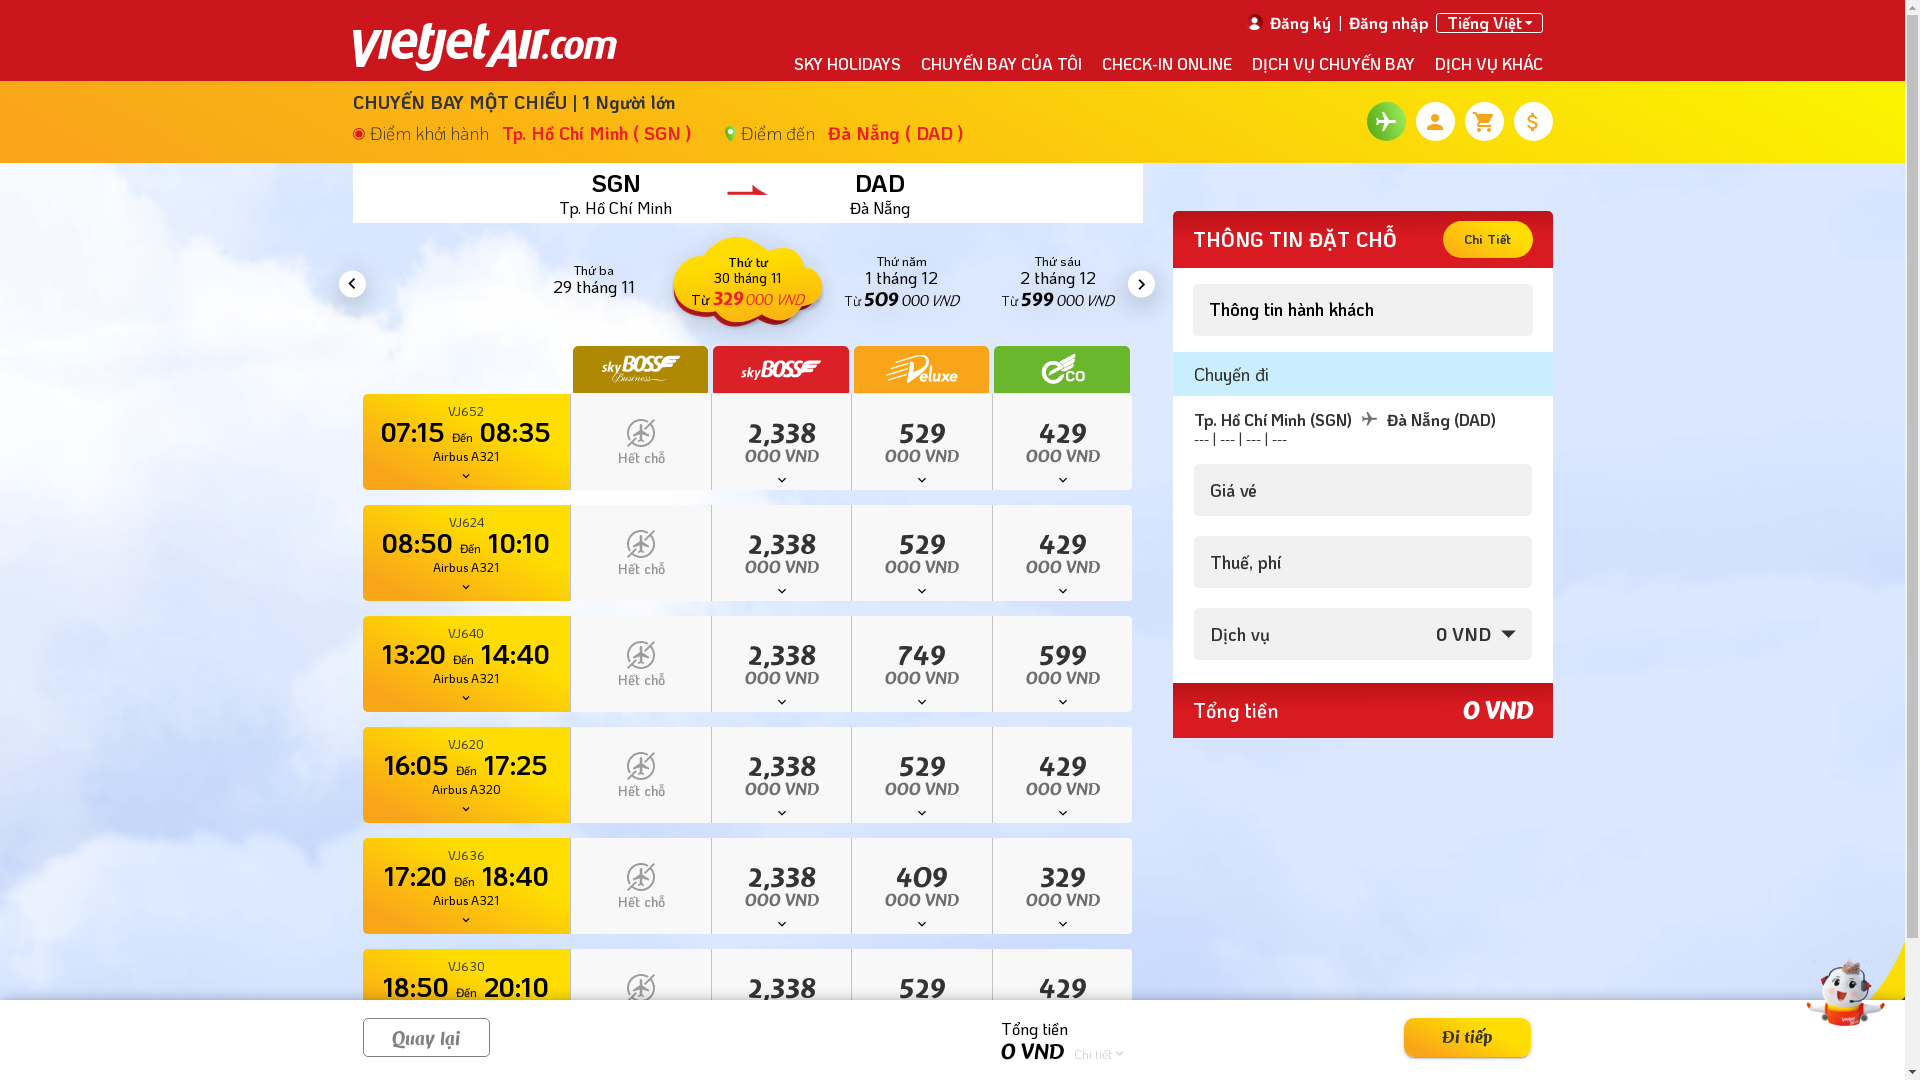

In [26]:
driver.save_screenshot('result.png')
img = Image.open('result.png')
img